In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, MultiHeadAttention, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow import keras

# Loading and Preprocessing Dataset

In [25]:
# 1) LOAD DATA
df = pd.read_csv("updated_file.csv")  
print("Data shape:", df.shape)
print(df.head())

# Handle missing values if any (drop or impute)
print("Missing values:\n", df.isna().sum())
df.dropna(inplace=True)

# Handle categorical variables using Label Encoding
categorical_features = ['Gender', 'Nationality', 'School_Type', 'Main_Administration', 'Candidacy_type']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)  # One-Hot Encoding


# Encode 'Result' column ('PASS' → 1, 'FAIL' → 0)
df['Result'] = df['Result'].map({'PASS': 1, 'FAIL': 0})


# Define features and target
X = df.drop(columns=['Result'])  # Features
y = df['Result']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Data shape: (38930, 9)
   Gender Nationality  Class_Level  Age_Real   School_Type  \
0  female       Saudi            3        21  Governmental   
1    male       Saudi            3        20  Governmental   
2  female       Saudi            3        19  Governmental   
3    male       Saudi            3        19  Governmental   
4  female       Saudi            3        19  Governmental   

  Main_Administration      Candidacy_type  Degree Result  
0              Riyadh      Self-Candidacy     593   FAIL  
1             Unknown      Self-Candidacy     600   FAIL  
2               Aseer      Self-Candidacy     640   PASS  
3               Jazan      Self-Candidacy     600   FAIL  
4             Eastern  Talented-Candidacy     713   PASS  
Missing values:
 Gender                 0
Nationality            0
Class_Level            0
Age_Real               0
School_Type            0
Main_Administration    0
Candidacy_type         0
Degree                 0
Result                 0
dtype: i

# EXPLORATORY DATA ANALYSIS (EDA)

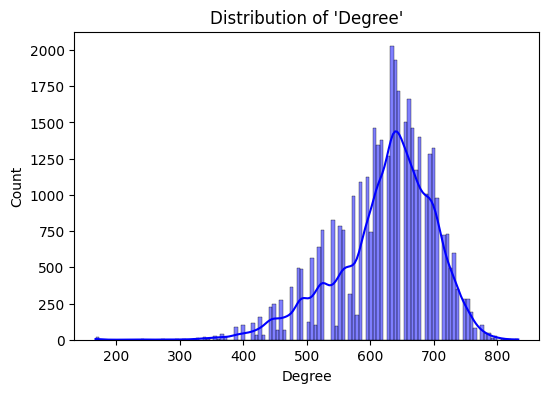

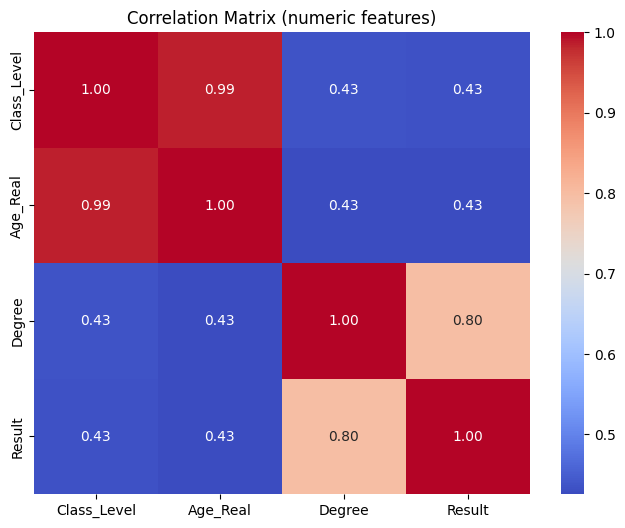

In [3]:


# Distribution of the raw target 'Degree'
plt.figure(figsize=(6,4))
sns.histplot(df['Degree'], kde=True, color='blue')
plt.title("Distribution of 'Degree'")
plt.show()

# 2.2 Distribution of a categorical variable (e.g., 'Gender') counts

if 'Gender' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Gender', data=df, palette='Set2')
    plt.title("Count of Gender categories")
    plt.show()

# 2.3 Correlation Heatmap (among numeric columns)
#     Convert categorical columns to numeric 
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (numeric features)")
plt.show()

# 2.4 Scatter plot of one numeric feature vs 'Degree'
some_numeric_column = "Age"  # Example only if you have "Age"
if some_numeric_column in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=some_numeric_column, y='Degree', data=df, color='green')
    plt.title(f"{some_numeric_column} vs. Degree")
    plt.show()




# ANN model

In [ ]:
df = pd.read_csv("updated_file.csv")  # Replace with actual filename
categorical_features = ['Gender', 'Nationality', 'School_Type', 'Main_Administration', 'Candidacy_type']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)  # One-Hot Encoding


# Encode 'Result' column ('PASS' → 1, 'FAIL' → 0)
df['Result'] = df['Result'].map({'PASS': 1, 'FAIL': 0})


# Define features and target
X = df.drop(columns=['Result'])  # Features
y = df['Result']  # Target

# One-hot encoding (if categorical variables exist)
X = pd.get_dummies(X, drop_first=True)

# Feature Scaling
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a very simple ANN Model
model = Sequential([
    Dense(4, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile Model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1, validation_split=0.2)

# Evaluate Model
y_pred = model.predict(X_test)
y_pred_rounded = np.round(y_pred)

# Compute Accuracy
accuracy_ann = accuracy_score(y_test, y_pred_rounded)
print("Accuracy:", accuracy_ann)
classificationann=classification_report(y_test, y_pred_rounded, output_dict=True)
print(classificationann)
precision_ann = classificationann["0"]["precision"]
recall_ann = classificationann["1"]["recall"]
f1_score_ann=classificationann["1"]["f1-score"]

Epoch 1/5
195/195 [==============================] - 2s 6ms/step - loss: 0.5154 - accuracy: 0.7499 - val_loss: 0.4677 - val_accuracy: 0.7910
Epoch 2/5
195/195 [==============================] - 1s 8ms/step - loss: 0.4436 - accuracy: 0.8102 - val_loss: 0.4090 - val_accuracy: 0.8374
Epoch 3/5
195/195 [==============================] - 1s 7ms/step - loss: 0.3899 - accuracy: 0.8466 - val_loss: 0.3611 - val_accuracy: 0.8658
Epoch 4/5
195/195 [==============================] - 1s 7ms/step - loss: 0.3440 - accuracy: 0.8701 - val_loss: 0.3198 - val_accuracy: 0.8793
Epoch 5/5
244/244 [==============================] - 1s 3ms/step
Accuracy: 0.8923709221679939


# Hybrid: LSTM+ANN with PCA

In [ ]:
X = df.drop(columns=["Result"])  # Features
y = df["Result"].values.reshape(-1, 1)  # Target reshaped for scaling
X = pd.get_dummies(X, drop_first=True)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Define whether to use PCA or not
use_pca = True  # Change to False to run without PCA

# Scale Features
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

if use_pca:
    print("Applying PCA...")
    pca = PCA(n_components=0.95)  # Keep 95% variance
    X_transformed = pca.fit_transform(X_scaled)
else:
    print("Skipping PCA...")
    X_transformed = X_scaled  # Use original scaled features

# Scale Target Variable
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_scaled, test_size=0.2, random_state=42)

# Reshape for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build Optimized ANN + LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output
])

# Compile Model
model.compile(optimizer='adam', loss='mse')

# Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train Model
model.fit(X_train, y_train, 
          epochs=10, batch_size=32, 
          verbose=1, validation_split=0.2, 
          callbacks=[early_stopping])

# Evaluate Model
y_pred = model.predict(X_test)

# Reverse Scale Target Variable
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test)

accuracy_hybrid = accuracy_score(y_test_original, np.round(y_pred_original))
classificationhyb=classification_report(y_test_original, np.round(y_pred_original), output_dict=True)
print("Accuracy",accuracy_hybrid)
print("Report",classificationhyb)
precision_hyb = classificationhyb["1"]["precision"]
recall_hyb = classificationhyb["1"]["recall"]
f1_score_hyb=classificationhyb["1"]["f1-score"]


Applying PCA...
Epoch 1/10


c:\Users\muham\OneDrive\Desktop\Project 14-02-2025\virtualenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1740 - val_loss: 0.0329
Epoch 2/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0388 - val_loss: 0.0205
Epoch 3/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0292 - val_loss: 0.0178
Epoch 4/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0211 - val_loss: 0.0141
Epoch 5/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0190 - val_loss: 0.0131
Epoch 6/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0145 - val_loss: 0.0127
Epoch 7/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0134 - val_loss: 0.0114
Epoch 8/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0121 - val_loss: 0.0088
Epoch 9/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0111 - val_loss: 0.0074
Epoch 10/10
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0113 - val_loss: 0.0103
Restoring model weights from the end of the best epoch: 9.
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy 0.988697662471102
Accuracy               

# Graph Attention Network

In [ ]:
################################################################################
#                           IMPORTS & SETUP
################################################################################
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from torch_geometric.data import Data
from torch_geometric.utils import from_scipy_sparse_matrix
from torch_geometric.nn import GATConv

from scipy.sparse import csr_matrix
from sklearn.neighbors import kneighbors_graph

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

################################################################################
#                   DATA PREPROCESSING & PREP FOR GAT
################################################################################
# Example: assume you already have a pandas DataFrame "df" with:
#   1) 'Result' as the target column (integer or categorical)
#   2) Various numeric/categorical features
#   3) Possibly you already have code for LabelEncoder, etc.

# Convert target to integer (classification)
# If 'Result' is already integer-coded [0..N-1], you can skip the astype(int).
df["Result"] = df["Result"].astype(int) 

categorical_cols = [
    "Gender",
    "Nationality",
    "Class_Level",
    "School_Type",
    "Main_Administration",
    "Candidacy_type"
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Define features (X) & target (y)
X = df.drop(["Result"], axis=1, errors='ignore')
y = df["Result"].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.05,
    random_state=42,
    stratify=y  # optional but recommended for classification
)

print(f"Train shape = {X_train.shape}, Test shape = {X_test.shape}")

################################################################################
#                BUILD PYTORCH GEOMETRIC DATA (k-NN Graph)
################################################################################
def build_pyg_data(X_array, y_array, k=5):
    """
    Builds a PyTorch Geometric 'Data' object from (features, target) + kNN adjacency.
    - X_array: NumPy array of shape [N, num_features]
    - y_array: NumPy array of shape [N], integer class labels
    - k: number of neighbors in kNN graph
    """
    # Create adjacency using kNN
    A = kneighbors_graph(X_array, n_neighbors=k, mode='connectivity', include_self=False)
    edge_index, _ = from_scipy_sparse_matrix(A)

    # Convert to Tensors
    x_t = torch.tensor(X_array, dtype=torch.float)
    y_t = torch.tensor(y_array, dtype=torch.long)  # long for classification

    return Data(x=x_t, edge_index=edge_index, y=y_t)

################################################################################
#                      GAT CLASSIFIER (Jumping Knowledge)
################################################################################
class GATClassifier(nn.Module):
    def __init__(
        self,
        in_channels,
        hidden_channels=128,
        num_layers=4,
        heads=8,
        num_classes=10,  # Adjust based on your dataset
        dropout=0.2
    ):
        """
        A deeper GAT model for classification with "jumping knowledge" (concat).
        - in_channels: number of input features
        - hidden_channels: hidden size for each GAT layer
        - num_layers: how many GAT layers
        - heads: attention heads in each GAT layer
        - num_classes: number of output classes
        - dropout: dropout probability
        """
        super().__init__()
        
        self.num_layers = num_layers
        self.dropout_val = dropout
        self.activation = nn.ELU()  # or nn.ReLU(), nn.LeakyReLU()
        
        # GAT layers + LayerNorm
        self.convs = nn.ModuleList()
        self.lns = nn.ModuleList()

        # 1) First GAT layer
        self.convs.append(
            GATConv(in_channels, hidden_channels, heads=heads, dropout=dropout)
        )
        self.lns.append(nn.LayerNorm(hidden_channels * heads))

        # 2) Additional GAT layers
        for _ in range(num_layers - 1):
            self.convs.append(
                GATConv(hidden_channels * heads, hidden_channels, heads=heads, dropout=dropout)
            )
            self.lns.append(nn.LayerNorm(hidden_channels * heads))
        
        # MLP after "jumping knowledge" => concatenation of all layer outputs
        # total hidden dimension: num_layers * (hidden_channels * heads)
        aggregate_dim = num_layers * hidden_channels * heads
        self.mlp = nn.Sequential(
            nn.Linear(aggregate_dim, 2 * hidden_channels),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(2 * hidden_channels, num_classes)
        )

        self.dropout = nn.Dropout(dropout)

    def forward(self, x, edge_index):
        """
        1. Pass x through each GAT layer
        2. Collect each layer's output
        3. Concatenate them (jumping knowledge)
        4. Final MLP => logits for classification
        """
        layer_outputs = []

        for conv, ln in zip(self.convs, self.lns):
            x = conv(x, edge_index)
            x = self.activation(x)
            x = ln(x)
            x = self.dropout(x)
            layer_outputs.append(x)

        # Concatenate all layer outputs along dimension=-1
        x_agg = torch.cat(layer_outputs, dim=-1)
        logits = self.mlp(x_agg)  # shape: [N, num_classes]

        return logits

################################################################################
#                     TRAINING FUNCTION FOR GAT (CLASSIFICATION)
################################################################################
def train_gat(
    model,
    train_data,
    val_data=None,
    epochs=100,
    lr=1e-3,
    weight_decay=1e-4,
    patience=10,
    print_interval=10
):
    """
    Train the GAT model for classification with optional early stopping
    on val_data. If val_data is None, it just trains on train_data.
    """
    model.to(device)
    train_data = train_data.to(device)
    if val_data is not None:
        val_data = val_data.to(device)

    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = nn.CrossEntropyLoss()

    best_val_acc = 0.0
    best_epoch = 0
    patience_counter = 0
    best_model_state = None

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # ---- TRAIN ----
        model.train()
        optimizer.zero_grad()

        logits = model(train_data.x, train_data.edge_index)
        loss_train = loss_fn(logits, train_data.y)
        loss_train.backward()
        optimizer.step()

        train_losses.append(loss_train.item())

        # If we have a validation set
        if val_data is not None:
            # ---- VALIDATION ----
            model.eval()
            with torch.no_grad():
                val_logits = model(val_data.x, val_data.edge_index)
                loss_val = loss_fn(val_logits, val_data.y)
                val_losses.append(loss_val.item())

                # Compute accuracy
                val_preds = val_logits.argmax(dim=1)
                val_correct = (val_preds == val_data.y).sum().item()
                val_acc = val_correct / val_data.y.shape[0]

            # Early Stopping logic
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_epoch = epoch
                patience_counter = 0
                best_model_state = model.state_dict()
            else:
                patience_counter += 1

            # Print occasionally
            if (epoch + 1) % print_interval == 0:
                print(f"[Epoch {epoch+1}/{epochs}] "
                      f"Train Loss: {loss_train.item():.4f}, "
                      f"Val Loss: {loss_val.item():.4f}, "
                      f"Val Acc: {val_acc:.4f} (Best={best_val_acc:.4f})")

            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}, best val acc={best_val_acc:.4f} (epoch={best_epoch+1})")
                break

        else:
            # No validation set => just print train loss occasionally
            if (epoch + 1) % print_interval == 0:
                print(f"[Epoch {epoch+1}/{epochs}] Train Loss: {loss_train.item():.4f}")

    # Load best model (if we had validation)
    if val_data is not None and best_model_state is not None:
        model.load_state_dict(best_model_state)

    return train_losses, val_losses, best_val_acc

################################################################################
#                         EVALUATION FUNCTIONS
################################################################################
def evaluate_model(model, data):
    """ Returns predicted classes and true labels for the given Data. """
    model.eval()
    data = data.to(device)
    with torch.no_grad():
        logits = model(data.x, data.edge_index)
        preds = logits.argmax(dim=1).cpu().numpy()
    y_true = data.y.cpu().numpy()
    return preds, y_true

################################################################################
#                  CROSS-VALIDATION + FINAL TRAINING + TEST
################################################################################
# 1) Cross-validation on X_train
n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
k_neighbors = 10  # try 5, 10, 15, etc. to see what works better

X_train_np = X_train.to_numpy()
y_train_np = y_train

fold_idx = 1
for train_index, val_index in kf.split(X_train_np):
    print(f"\n======== FOLD {fold_idx} / {n_splits} ========")
    X_tr_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
    y_tr_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

    # Scale features
    scaler = StandardScaler()
    X_tr_fold_scaled = scaler.fit_transform(X_tr_fold)
    X_val_fold_scaled = scaler.transform(X_val_fold)

    # Build PyG data
    train_data_fold = build_pyg_data(X_tr_fold_scaled, y_tr_fold, k=k_neighbors)
    val_data_fold   = build_pyg_data(X_val_fold_scaled, y_val_fold, k=k_neighbors)

    # Number of classes
    num_classes = len(np.unique(y_train))  # or y_tr_fold if guaranteed same set

    # Define GAT model
    model = GATClassifier(
        in_channels=train_data_fold.num_features,
        hidden_channels=128,
        num_layers=4,
        heads=8,
        num_classes=num_classes,
        dropout=0.2
    )

    # Train
    _, _, best_val_acc = train_gat(
        model,
        train_data=train_data_fold,
        val_data=val_data_fold,
        epochs=200,
        lr=1e-3,
        weight_decay=1e-4,
        patience=15,
        print_interval=20
    )
    print(f"[FOLD {fold_idx}] Best Val Accuracy = {best_val_acc:.4f}")

    # Evaluate on val set
    val_preds, val_true = evaluate_model(model, val_data_fold)
    fold_acc = accuracy_score(val_true, val_preds)
    print(f"[FOLD {fold_idx}] Final Val Accuracy = {fold_acc:.4f}")

    fold_idx += 1

# 2) Final training on *all* X_train
print("\n===== TRAINING FINAL GAT ON FULL TRAIN SET =====")
scaler_full = StandardScaler()
X_train_scaled_full = scaler_full.fit_transform(X_train)

train_data_full = build_pyg_data(X_train_scaled_full, y_train, k=k_neighbors)

num_classes = len(np.unique(y_train))
final_model = GATClassifier(
    in_channels=train_data_full.num_features,
    hidden_channels=128,
    num_layers=4,
    heads=8,
    num_classes=num_classes,
    dropout=0.2
)

# Train final model (no separate val => might overfit, but we do it as a demonstration)
_, _, _ = train_gat(
    final_model,
    train_data=train_data_full,
    val_data=None,        # no validation set => watch out for potential overfitting
    epochs=100,
    lr=1e-3,
    weight_decay=1e-4,
    patience=10
)

# 3) Evaluate on test set
X_test_scaled = scaler_full.transform(X_test)
test_data = build_pyg_data(X_test_scaled, y_test, k=k_neighbors)

test_preds, test_true = evaluate_model(final_model, test_data)
test_acc = accuracy_score(test_true, test_preds)
print(f"Test Accuracy = {test_acc:.4f}")

# Optional: Classification report
print("\nClassification Report (Test):")
print(classification_report(test_true, test_preds))
classificationgat=classification_report(test_true, test_preds, output_dict=True)
precision_gat = classificationgat["0"]["precision"]
recall_gat= classificationgat["1"]["recall"]
f1_score_gat=classificationgat["1"]["f1-score"]


Using device: cpu
Train shape = (36983, 22), Test shape = (1947, 22)

======== FOLD 1 / 3 ========
[Epoch 20/200] Train Loss: 0.0026, Val Loss: 0.0162, Val Acc: 0.9973 (Best=0.9973)
[Epoch 40/200] Train Loss: 0.0016, Val Loss: 0.0103, Val Acc: 0.9974 (Best=0.9976)
Early stopping at epoch 44, best val acc=0.9976 (epoch=29)
[FOLD 1] Best Val Accuracy = 0.9976
[FOLD 1] Final Val Accuracy = 0.9974

======== FOLD 2 / 3 ========
[Epoch 20/200] Train Loss: 0.0039, Val Loss: 0.0342, Val Acc: 0.9954 (Best=0.9954)
[Epoch 40/200] Train Loss: 0.0018, Val Loss: 0.0197, Val Acc: 0.9958 (Best=0.9959)
[Epoch 60/200] Train Loss: 0.0011, Val Loss: 0.0163, Val Acc: 0.9963 (Best=0.9968)
Early stopping at epoch 67, best val acc=0.9968 (epoch=52)
[FOLD 2] Best Val Accuracy = 0.9968
[FOLD 2] Final Val Accuracy = 0.9966

======== FOLD 3 / 3 ========
[Epoch 20/200] Train Loss: 0.0014, Val Loss: 0.0143, Val Acc: 0.9979 (Best=0.9979)
[Epoch 40/200] Train Loss: 0.0010, Val Loss: 0.0089, Val Acc: 0.9982 (Best=0.99

# Autoencoder

In [ ]:


# Load dataset
df = pd.read_csv("updated_file.csv")

# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables
categorical_features = ['Gender', 'Nationality', 'School_Type', 'Main_Administration', 'Candidacy_type']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Encode target variable
df['Result'] = df['Result'].map({'PASS': 1, 'FAIL': 0})

# Define features and target
X = df.drop(columns=['Result'])
y = df['Result']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Autoencoder Architecture
input_dim = X_train_scaled.shape[1]
encoding_dim = 16  # Increased encoding dimension

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dropout(0.2)(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder Model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test_scaled, X_test_scaled))

# Extract Encoder
encoder = Model(input_layer, encoded)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

# Define MLP Classifier
mlp_model = keras.Sequential([
    Dense(64, activation='relu', input_shape=(encoding_dim,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train MLP
mlp_model.fit(X_train_encoded, y_train, epochs=100, batch_size=32, validation_data=(X_test_encoded, y_test))

# Evaluate Model
y_pred = (mlp_model.predict(X_test_encoded) > 0.5).astype('int')
accuracy = accuracy_score(y_test, y_pred)
print("MLP Accuracy with Autoencoder features:", accuracy)
print(classification_report(y_test, y_pred))
classificationenc=classification_report(y_test, y_pred, output_dict=True)
precision_enc = classificationenc["0"]["precision"]
recall_enc= classificationenc["1"]["recall"]
f1_score_enc=classificationenc["1"]["f1-score"]


Epoch 1/100
1095/1095 [==============================] - 4s 2ms/step - loss: 0.7391 - val_loss: 0.6445
Epoch 2/100
1095/1095 [==============================] - 3s 2ms/step - loss: 0.6408 - val_loss: 0.6389
Epoch 3/100
1095/1095 [==============================] - 2s 2ms/step - loss: 0.6358 - val_loss: 0.6378
Epoch 4/100
1095/1095 [==============================] - 2s 2ms/step - loss: 0.6335 - val_loss: 0.6370
Epoch 5/100
1095/1095 [==============================] - 2s 2ms/step - loss: 0.6324 - val_loss: 0.6368
Epoch 6/100
1095/1095 [==============================] - 2s 2ms/step - loss: 0.6316 - val_loss: 0.6367
Epoch 7/100
1095/1095 [==============================] - 2s 2ms/step - loss: 0.6313 - val_loss: 0.6366
Epoch 8/100
1095/1095 [==============================] - 2s 2ms/step - loss: 0.6310 - val_loss: 0.6364
Epoch 9/100
1095/1095 [==============================] - 3s 2ms/step - loss: 0.6307 - val_loss: 0.6363
Epoch 10/100
1095/1095 [==============================] - 2s 2ms/step - l

# LSTM+ANN+Transformer

In [ ]:

import tensorflow as tf
df = pd.read_csv("updated_file.csv") 
# Encode categorical variables
categorical_columns = ['Gender', 'Nationality', 'School_Type', 'Main_Administration', 'Candidacy_type']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
df[['Age_Real', 'Degree']] = scaler.fit_transform(df[['Age_Real', 'Degree']])

# Convert 'Result' column into binary labels (PASS=1, FAIL=0)
df['Result'] = df['Result'].apply(lambda x: 1 if x == 'PASS' else 0)

# Split data into features and labels
X = df.drop(columns=['Result'])
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

# Define Transformer Encoder Layer
class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerEncoder, self).__init__()
        self.mha = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.norm1 = LayerNormalization(epsilon=1e-6)
        self.norm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)
        self.ffn = keras.Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])

    def call(self, inputs, training):
        attn_output = self.mha(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.norm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.norm2(out1 + ffn_output)

# Build Hybrid Model
input_layer = Input(shape=(X_train.shape[1],))

# Transformer Block
embed_dim = 16  # Feature embedding size
num_heads = 2   # Number of attention heads
ff_dim = 32     # Feedforward layer dimension
transformer_output = TransformerEncoder(embed_dim, num_heads, ff_dim)(tf.expand_dims(input_layer, -1))
flattened_transformer = Flatten()(transformer_output)

# LSTM Block
lstm_input = tf.expand_dims(input_layer, axis=-1)  # Reshape for LSTM
lstm_output = LSTM(32, return_sequences=False)(lstm_input)

# ANN Block
ann_output = Dense(64, activation='relu')(input_layer)
ann_output = Dense(32, activation='relu')(ann_output)

# Concatenate outputs
concat = tf.keras.layers.Concatenate()([flattened_transformer, lstm_output, ann_output])
output_layer = Dense(1, activation='sigmoid')(concat)

# Compile Model
model = keras.Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
# Evaluate Model
accuracy_tri = accuracy_score(y_test, np.round(y_pred))
classificationtri=classification_report(y_test, np.round(y_pred), output_dict=True)
print("Accuracy",accuracy_tri)
print("Accuracy",classificationtri)
precision_tri = classificationtri["0"]["precision"]
recall_tri=classificationtri["1"]["recall"]
f1_score_tri=classificationtri["1"]["f1-score"]

Epoch 1/10
974/974 [==============================] - 24s 13ms/step - loss: 0.0879 - accuracy: 0.9701 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 2/10
974/974 [==============================] - 9s 10ms/step - loss: 0.0116 - accuracy: 0.9981 - val_loss: 0.0067 - val_accuracy: 0.9999
Epoch 3/10
974/974 [==============================] - 10s 10ms/step - loss: 0.0049 - accuracy: 0.9997 - val_loss: 0.0036 - val_accuracy: 0.9999
Epoch 4/10
974/974 [==============================] - 9s 10ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/10
974/974 [==============================] - 9s 10ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 6.5746e-04 - val_accuracy: 1.0000
Epoch 6/10
974/974 [==============================] - 9s 10ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 5.3086e-04 - val_accuracy: 1.0000
Epoch 7/10
974/974 [==============================] - 10s 10ms/step - loss: 4.1032e-04 - accuracy: 1.0000 - val_loss: 5.5972e-04 - v

# Visualizations

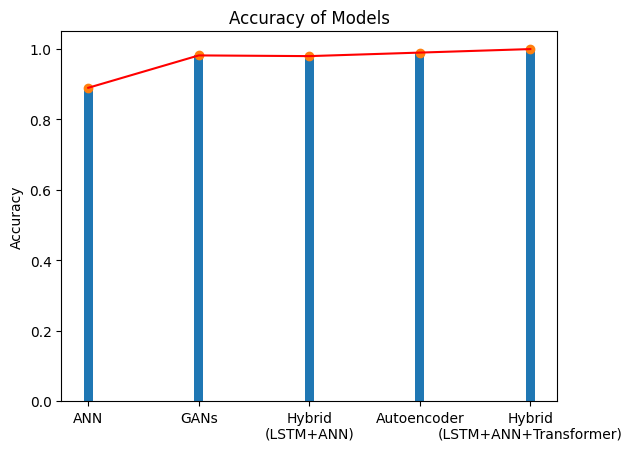

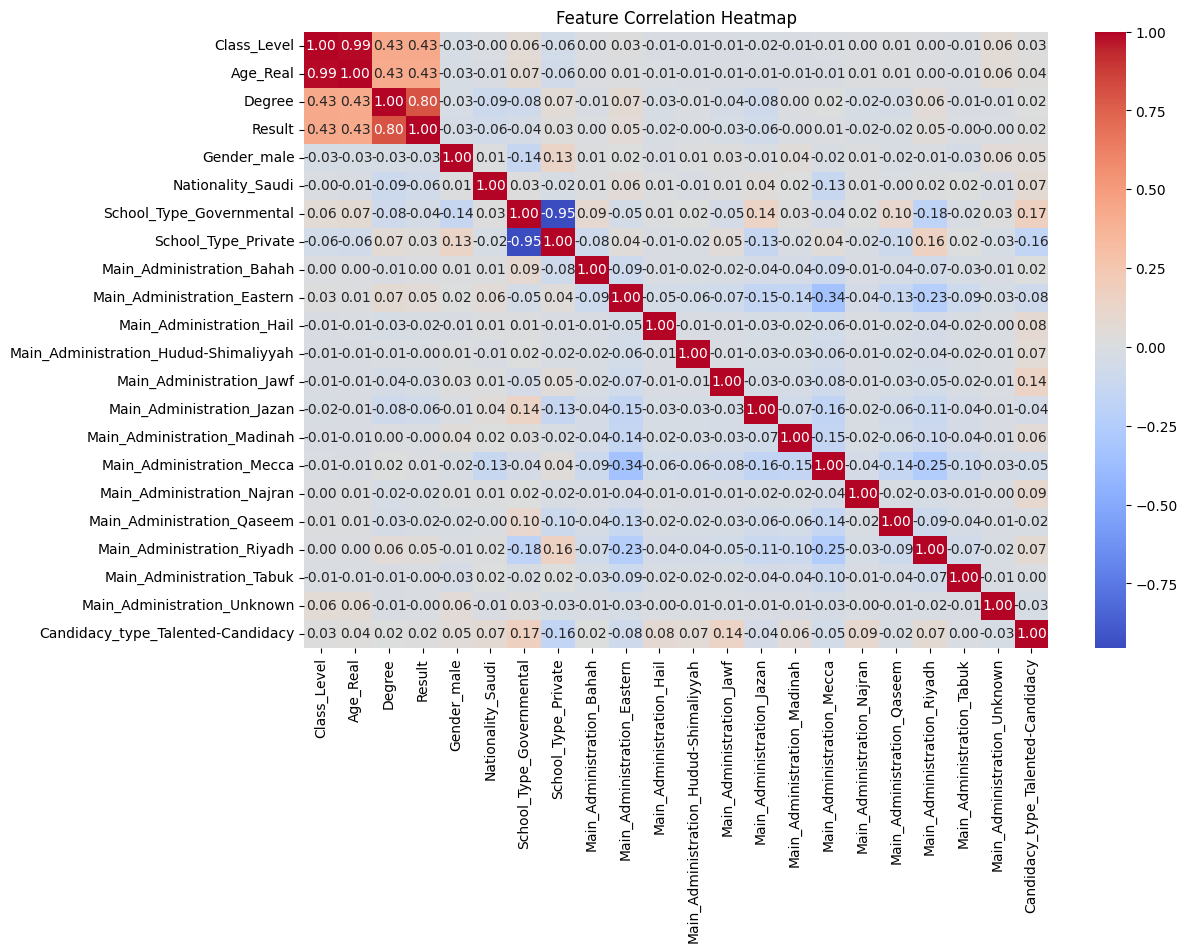

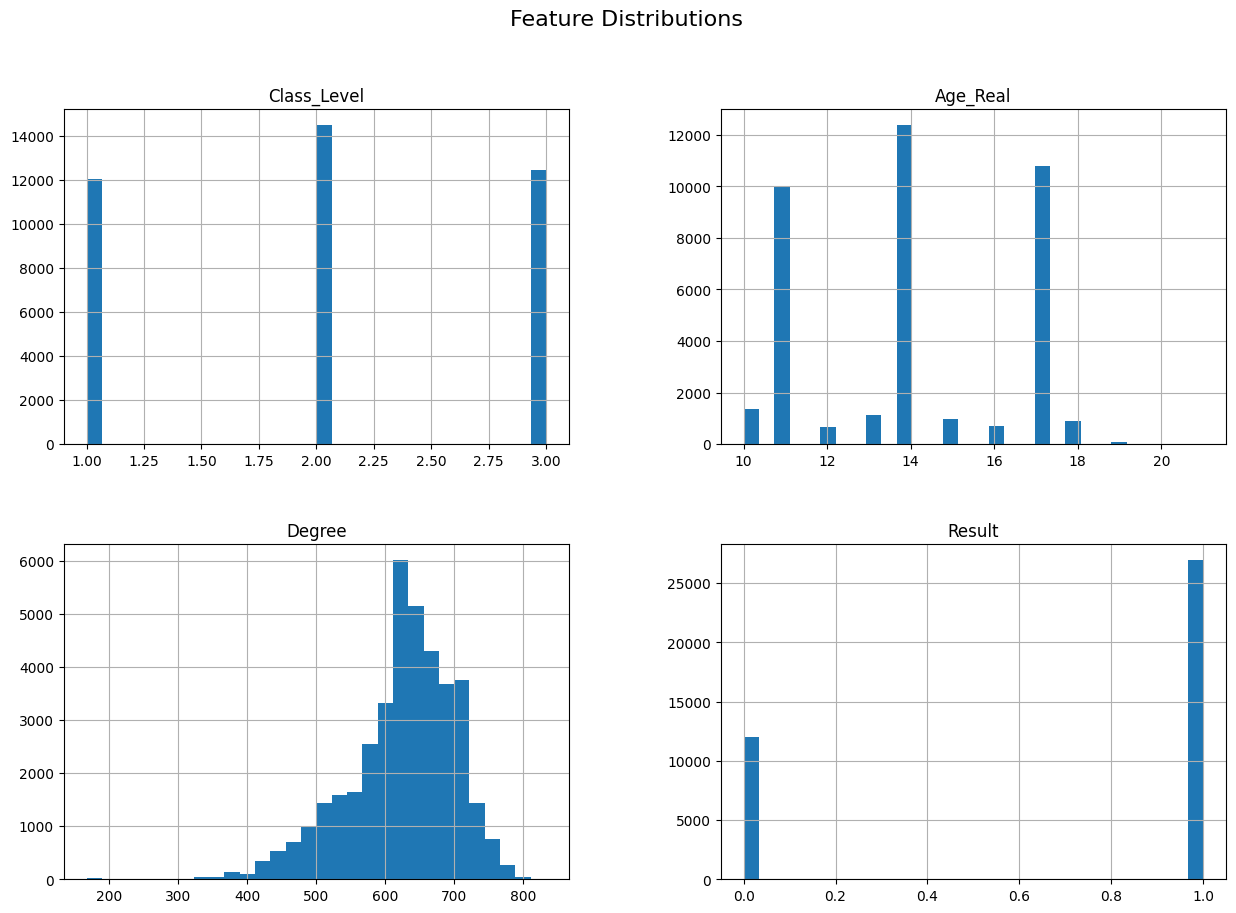

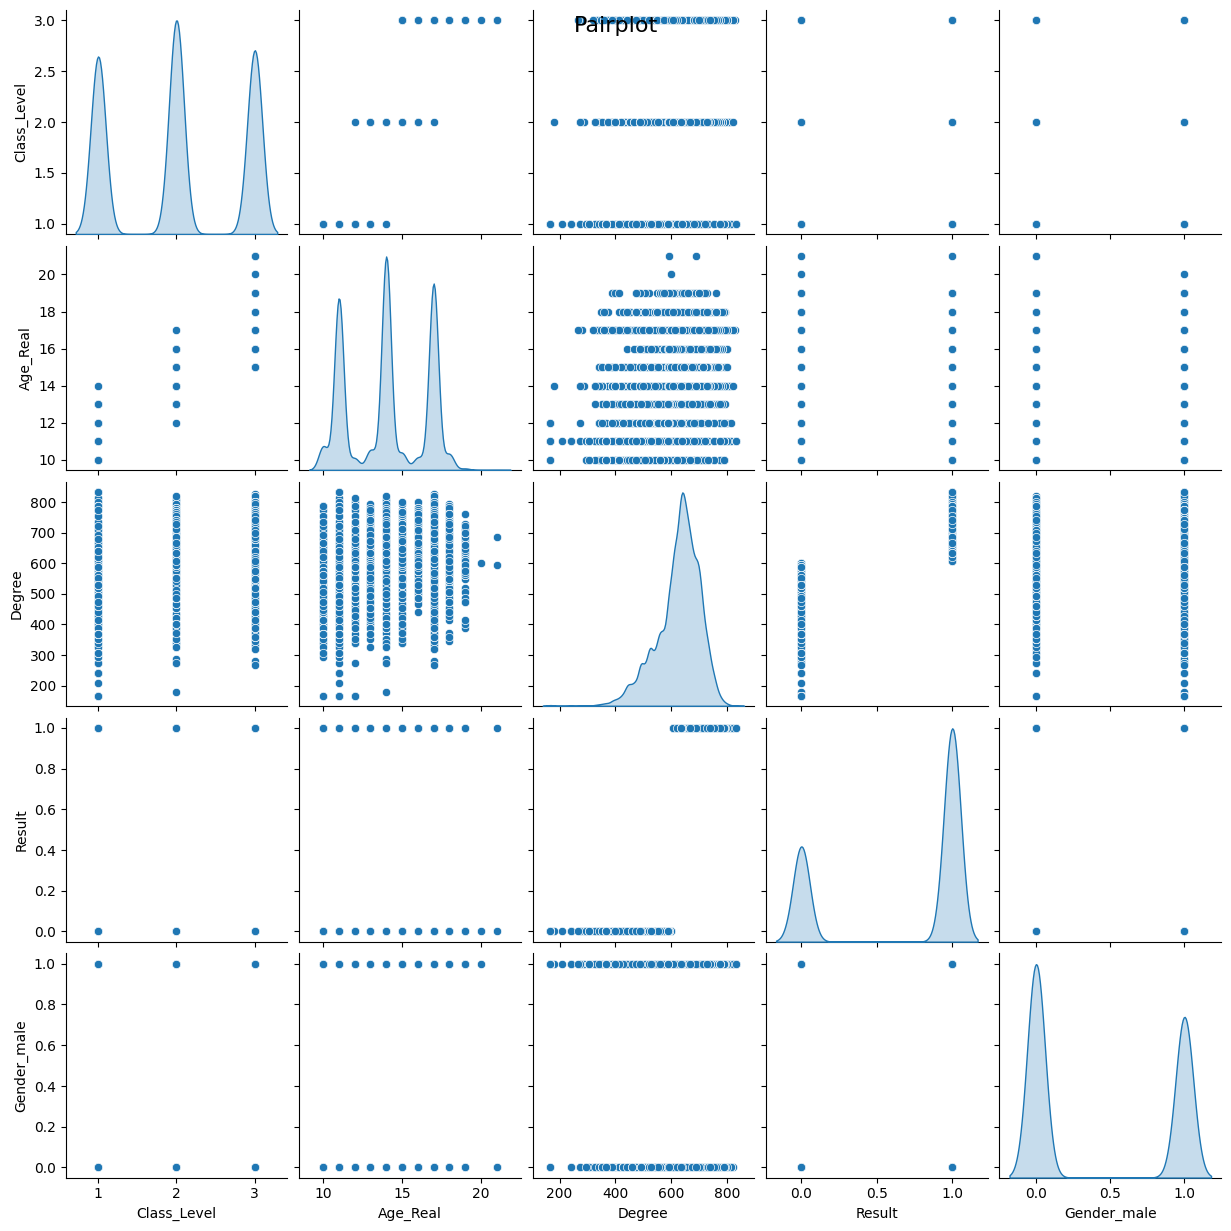

In [26]:
mae=[accuracy_ann,test_acc,accuracy_hybrid,accuracy,accuracy_tri]
X_axis=['ANN','GANs','Hybrid (LSTM+ANN)','Autoencoder','Hybrid (LSTM+ANN+Transformer)']
X_axis_wrapped = [cat.replace(" ", "\n", 1) for cat in X_axis]
plt.title('Accuracy of Models')
plt.ylabel('Accuracy')
x_pos = [0,10,20,30,40]
# Create bars
plt.bar(x_pos, mae)
plt.plot(x_pos,mae,color = 'r')
plt.scatter(x_pos,mae)
# Create names on the x-axis
plt.xticks(x_pos, X_axis_wrapped)

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


sample_cols = df.columns[:5]  
sns.pairplot(df[sample_cols], diag_kind='kde')
plt.suptitle("Pairplot", fontsize=16)
plt.show()



In [27]:
from tabulate import tabulate
# Model Names
X_labels = ['ANN','GANs','Hybrid (LSTM+ANN)','Autoencoder','Hybrid (LSTM+ANN+Transformer)']

# Metrics Data
metrics_data = {
    "Model": X_labels,
    "Accuracy": [
        accuracy_ann,test_acc,accuracy_hybrid,accuracy,accuracy_tri
    ],
    "Precision": [
        precision_ann,precision_gat,precision_hyb,precision_enc,precision_tri
    ],
    "Recall": [
        recall_ann,recall_gat,recall_hyb,recall_enc,recall_tri
    ],
     "F1-Score": [
        f1_score_ann,f1_score_gat,f1_score_hyb,f1_score_enc,f1_score_tri
    ],
}

# Create DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Print table
print("\n===== Model Performance Comparison =====\n")
print(tabulate(df_metrics, headers="keys", tablefmt="fancy_grid"))


===== Model Performance Comparison =====

╒════╤═══════════════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│    │ Model                         │   Accuracy │   Precision │   Recall │   F1-Score │
╞════╪═══════════════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│  0 │ ANN                           │      0.89  │    0.900905 │ 0.963205 │   0.924857 │
├────┼───────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  1 │ GANs                          │      0.982 │    0.98     │ 0.99     │   0.99     │
├────┼───────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  2 │ Hybrid (LSTM+ANN)             │      0.98  │    0.99     │ 0.99     │   0.99     │
├────┼───────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  3 │ Autoencoder                   │      0.99  │    1        │ 0.99     │   1        │
├────┼───────────────────────────────┼────────────┼──────